## k-means

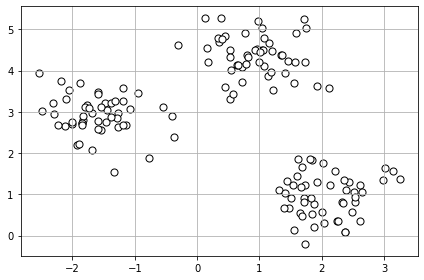

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0
)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

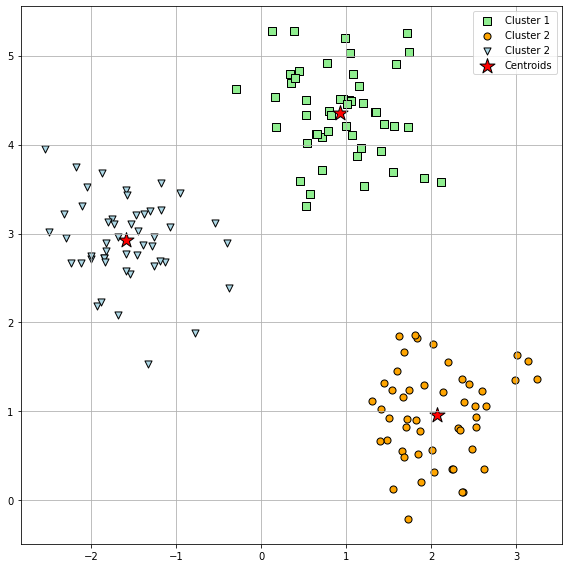

In [5]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
y_km = km.fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    s=50,
    c='lightgreen',
    edgecolor='black',
    marker='s',
    label='Cluster 1'
)
plt.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    s=50,
    c='orange',
    edgecolor='black',
    marker='o',
    label='Cluster 2'
)
plt.scatter(
    X[y_km == 2, 0],
    X[y_km == 2, 1],
    s=50,
    c='lightblue',
    edgecolor='black',
    marker='v',
    label='Cluster 2'
)
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250,
    c='red',
    edgecolor='black',
    marker='*',
    label='Centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

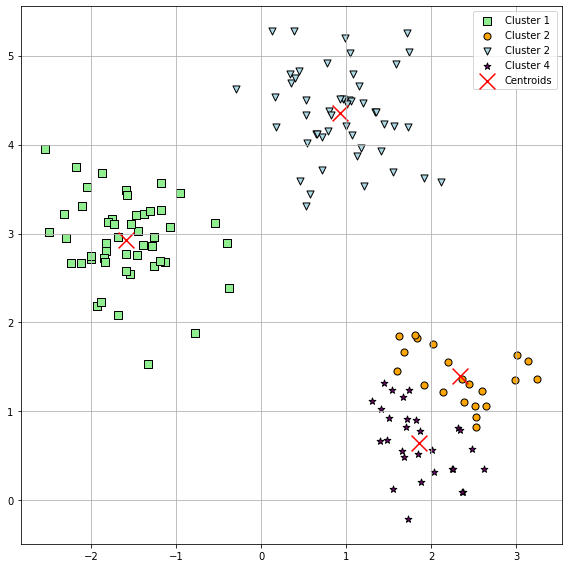

In [9]:
km = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
y_km = km.fit_predict(X)

plt.figure(figsize=(8, 8))
plt.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    s=50,
    c='lightgreen',
    edgecolor='black',
    marker='s',
    label='Cluster 1'
)
plt.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    s=50,
    c='orange',
    edgecolor='black',
    marker='o',
    label='Cluster 2'
)
plt.scatter(
    X[y_km == 2, 0],
    X[y_km == 2, 1],
    s=50,
    c='lightblue',
    edgecolor='black',
    marker='v',
    label='Cluster 2'
)
plt.scatter(
    X[y_km == 3, 0],
    X[y_km == 3, 1],
    s=50,
    c='purple',
    edgecolor='black',
    marker='*',
    label='Cluster 4'
)
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250,
    c='red',
    edgecolor='black',
    marker='x',
    label='Centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()